# Simple Linear Regression

## key concepts
- `correlation`: function to measure the strength of linear relationship b/w 2 variables.
- Now, also interested in understanding the nature of the relationship.

The linear regression model is given by:

$$
y_i = \beta x_i + \alpha + \varepsilon_i
$$

Where:
- $y_i$ = dependent variable (response)
- $x_i$ = independent variable (predictor)
- $\beta$ = slope (effect of $x$ on $y$)
- $\alpha$ = intercept
- $\varepsilon_i$ = error term (noise)

> The $\varepsilon_i$ can be understood in better detail as :
> - Error term to represent that there are other factors not accounted for by this simple model.
> - In 3b1b term, model is trying to do _book-keeping_. [Reference](https://youtu.be/9-Jl0dxWQs8?si=35nObUMC-FQVgPPh)

-----------

For simplicity, in the book _Data Science from Scratch_, it was explained as $\beta$, $\alpha$ is already calculated.

In [1]:
def predict(alpha: float, beta: float, x_i) -> float:
    return beta * x_i + alpha

- Randomly choosing $\beta$, $\alpha$ can provide a _prediction_.
- Therefore, if we have $y_i$, we can calculate _error_.

In [2]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    "error or loss calculation"
    return (y_i - predict(alpha, beta, x_i))

We want to measure errors across the whole dataset, but just adding them (or their absolute values) isn't good because outliers can mess things up.
> So, we use **squared errors** instead.

In [3]:
import os
os.chdir("..")

In [4]:
from support.linear_algebra import Vector

def sum_of_squared_errors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x, y))

> If you look closely, you’ll see the main goal here.    
> We don’t just want to calculate the squared error, we want to **find the best**
> values of $\alpha$ and $\beta$ that **make the squared error as small as possible**.

That’s what simple linear regression is all about — finding a line that fits the data best by minimising the total error.

In [5]:
from typing import Tuple
from support.statistics import correlation, stddev, mean

In [6]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """Given two vectors x & y,  
        find the values of alpha & beta that minimise the squared error."""
    beta = correlation(x, y) * stddev(y)/stddev(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

To understand the logic behind the formula:

- $\beta$ explains how $y$ changes **with** $x$ — it captures the **relationship** or **spread** of $y$ for each unit change in $x$.
- $\alpha$ explains where the line **starts** — it anchors the prediction when $x$ is zero.

> - If $x$ and $y$ are strongly related, then increasing $x$ by one standard deviation increases the prediction by roughly one standard deviation of $y$.  
> - If they’re negatively related, increasing $x$ decreases the prediction.  
> - If there’s no relation, then $\beta = 0$, and changes in $x$ don’t affect the prediction at all.

In [7]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

assert least_squares_fit(x, y) == (-5, 3)

#### Let’s apply the `least_squares_fit` function to a real dataset and visualise the result.    

---

- I am going to use the `boston housing` dataset (available via `scikit-learn`).     
- I am predicting *median house price (`MEDV`) from average number of rooms (`RM`)*, which is a classic simple linear regression task.

---

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

%matplotlib inline

In [9]:
# getting this directly from sklearn datasets page
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [10]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['value'] = housing.target
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,value
18838,1.8533,15.0,4.903096,1.078062,1784.0,2.401077,41.72,-122.65,0.575
12628,1.3679,23.0,4.065250,1.201821,1740.0,2.640364,38.50,-121.48,0.703
14270,2.0673,37.0,4.083019,1.109434,1146.0,4.324528,32.69,-117.12,0.885
5234,2.0187,39.0,4.876068,1.102564,1313.0,5.611111,33.94,-118.23,0.901
9738,3.2937,25.0,4.746154,1.071795,1678.0,4.302564,36.77,-121.75,1.353
2041,7.2211,30.0,6.413158,0.918421,1005.0,2.644737,36.73,-119.69,1.717
4982,2.0809,52.0,5.631004,1.078603,1558.0,3.401747,34.00,-118.29,1.096
750,4.2733,22.0,5.224764,1.098250,1830.0,2.462988,37.67,-122.06,1.807
3286,1.3000,11.0,7.141243,1.531073,370.0,2.090395,39.09,-122.53,0.697
4578,2.3636,32.0,3.633947,1.096115,1684.0,3.443763,34.07,-118.28,1.900


> let's visualise...

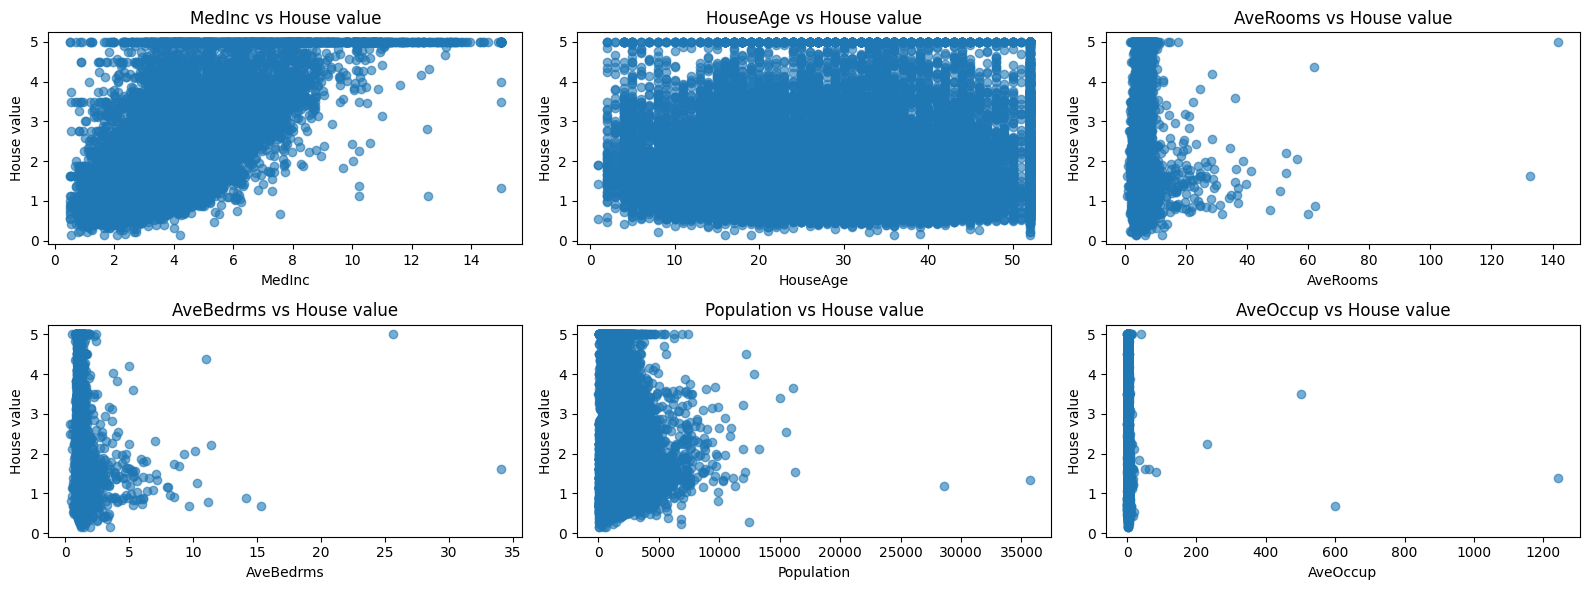

In [11]:
# some data visualisations
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
axes = axes.flatten()

for idx, column_name in enumerate(housing.feature_names[0:6]):
    ax = axes[idx]
    ax.scatter(df[column_name], df['value'], alpha=0.6)
    ax.set_xlabel(column_name)
    ax.set_ylabel('House value')
    ax.set_title(f'{column_name} vs House value')

plt.tight_layout()
plt.show()


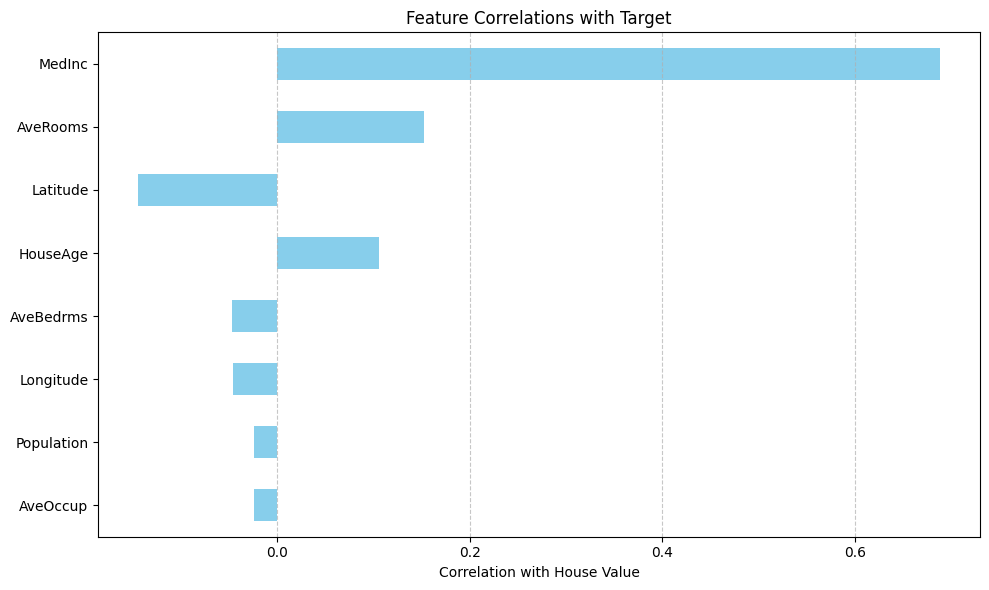

In [12]:
correlations = df.corr(numeric_only=True)['value'].drop('value')
sorted_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='barh', color='skyblue')
plt.xlabel("Correlation with House Value")
plt.title("Feature Correlations with Target")
plt.gca().invert_yaxis()  # highest correlation on top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> - Because this notebook is mostly about *simple linear regression*.    
> - I am selecting only `MedInc` as independent variable.

In [13]:
x = df['MedInc']
y = df['value']

In [14]:
alpha, beta = least_squares_fit(x, y)
alpha, beta

(np.float64(0.45088547801820966), np.float64(0.41793849225767704))

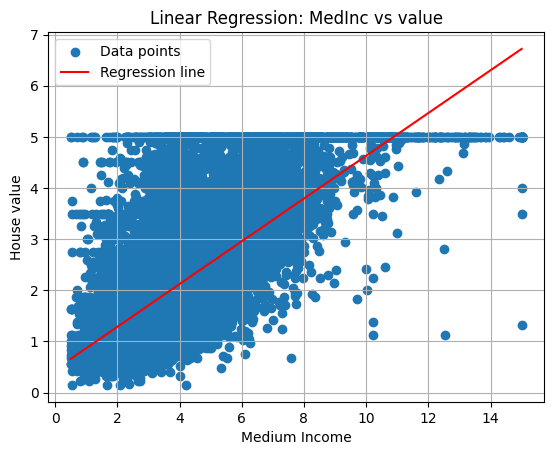

In [15]:
# Prediction line
x_vals = sorted(x)
y_pred = [alpha + beta * xi for xi in x_vals]

plt.scatter(x, y, label="Data points")
plt.plot(x_vals, y_pred, color='red', label="Regression line")
plt.xlabel("Medium Income")
plt.ylabel("House value")
plt.title("Linear Regression: MedInc vs value")
plt.legend()
plt.grid(True)
plt.show()

Now, to actually answer how well the fit was...

**R-squared** — it tells us *how much of the variation in $y$* is explained by our model (using $x$).

> - If R-squared is 1, the model is perfect.  
> - If it’s 0, the model does no better than just guessing the average of $y$.

In [16]:
from support.statistics import de_mean

def total_sum_of_squares(y: Vector) -> float:
    """Total variation in y (squared distance from mean)"""
    return sum(v**2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: float, y: float) -> float:
    """Fraction of variation in y explained by the model."""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

In [17]:
r_sq = r_squared(alpha, beta, x, y)
r_sq

np.float64(0.47344749183616464)

## Time to use gradient-descent

In [18]:
import numpy as np

from tqdm import trange

from support.gradient_descent import gradient_step

In [19]:
# Hyperparameters
np.random.seed(123)

guess = [np.random.rand(), np.random.rand()]
learning_rate = 10^10
num_epochs = 10
losses=[]

This code below is using **gradient descent** to find the best values of $\alpha$ and $\beta$
for a simple linear regression model.

- It starts with an initial guess for $\alpha$ and $\beta$.
- In each loop (epoch), it:
  - Calculates how far off the predictions are (errors).
  - Computes how much to adjust $\alpha$ and $\beta$ to reduce the error.
  - Updates the guess using these adjustments (gradients).
  - Tracks how the total error (loss) is changing.

The objective here is to keep adjusting the line so it fits the data better and better.

In [20]:
with trange(num_epochs) as t:
    for _ in t:
        new_alpha, new_beta = guess

        # computing loss
        loss = sum_of_squared_errors(alpha, beta, x, y)
        losses.append(loss)
        t.set_description(f"loss: {loss: .3f}")
        
        # partial derivative of loss wrt alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i) 
                     for x_i, y_i in zip(x, y))

        # partial derivative of loss wrt beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                    for x_i, y_i in zip(x, y))

        # update guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

loss:  14471.347: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 55.46it/s]


In [21]:
new_alpha, new_beta

(np.float64(0.6964691855978616), np.float64(0.28613933495037946))

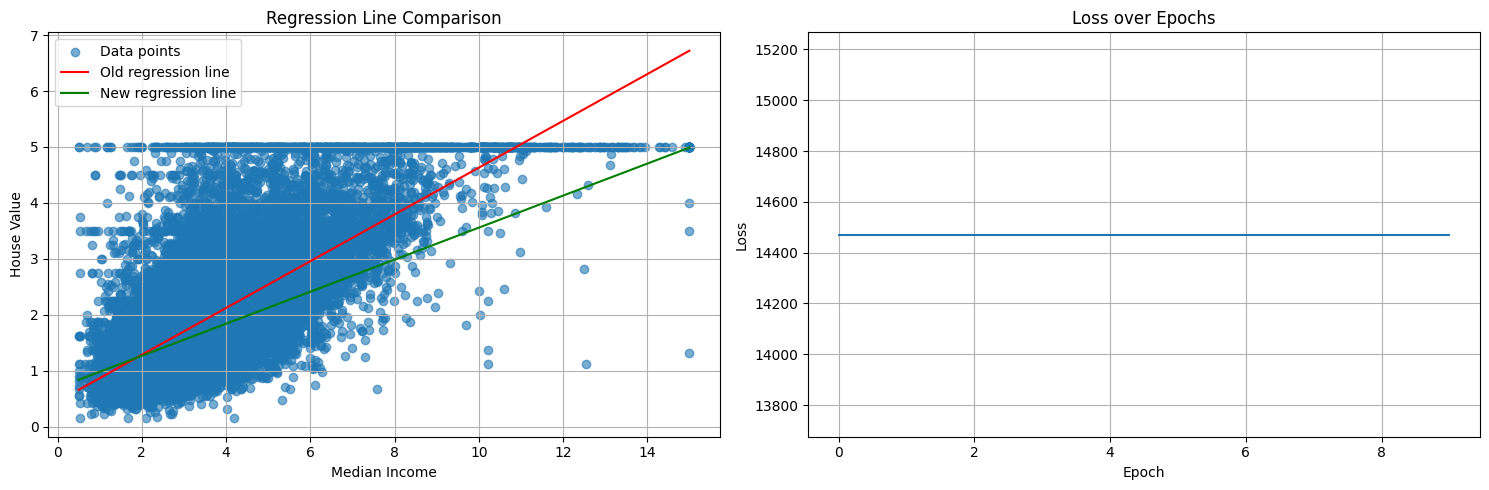

In [22]:
# Prepare predictions
x_vals = sorted(x)
y_pred_old = [alpha + beta * xi for xi in x_vals]
y_pred_new = [new_alpha + new_beta * xi for xi in x_vals]

# subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# --- Left plot: Regression lines ---
axs[0].scatter(x, y, label="Data points", alpha=0.6)
axs[0].plot(x_vals, y_pred_old, color='red', label="Old regression line")
axs[0].plot(x_vals, y_pred_new, color='green', label="New regression line")
axs[0].set_xlabel("Median Income")
axs[0].set_ylabel("House Value")
axs[0].set_title("Regression Line Comparison")
axs[0].legend()
axs[0].grid(True)

# --- Right plot: Loss curve ---
axs[1].plot(losses)
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss over Epochs")
axs[1].grid(True)

plt.tight_layout()
plt.show()

> - As the data is too simple and cannot be completely explained by the selected *independent variable*.    
> - The data is too simple for the task (only one feature), and not fully explainable with a straight line.    

- Loss is flat because gradient descent converged instantly or started at a flat region
- There’s no benefit in further training — the line won’t improve unless we add more features or use a more flexible model.

-------

## Maximum Likelihood estimation & Linear Regression
### Justification (or my understanding)

- We choose to minimise the `sum of squared errors` in SLR because....

> - Assume a sample of data like $v_1, v_2, v_3 .... v_n$ which is drawn from some *unknown* probability distribution.
> - This unknown probability distribution is controlled by a parameter, say $\theta$.

The probability in this case will be denoted as:
$$p(v_1, .., v_n|\theta)$$

This can be read (or understood or called) as the *likelihood of the parameter $\theta$ given the data:*
$$L(\theta|v_1, .., v_n)$$

- MLE says that we should choose a value of $\theta$ that *maximises* this *likelihood*
    - The value which makes the observed data most probable.
 
----
### For regression

The assumptions regarding the errors (technically called *residuals*) are:
1. Errors are normally distributed.
2. Errors have a mean of 0 and a standard deviation of $\sigma^2$

For each observed point $(x_i, y_i)$:
$$y_i = \alpha + \beta.x_i + \epsilon_i$$ where $\epsilon_i \in \mathscr{N}(0, \sigma^2)$

Therefore, the likelihood of observing $y_i$ given $x_i, \alpha and \beta$ is:
$$L(\alpha, \beta|x_i, y_i, \sigma) = \frac{1}{\sqrt{2\pi\sigma}}\exp({-\frac{(y_i - \alpha - \beta x_i)^2}{2\sigma^2}})$$

----
### Least squares connection
We do not have one data point but multiple data points and therefore, have to calculate *likelihood* of all data-points, multiplying the likelihood of all individual points:

$$L(\alpha, \beta) = \prod_{i=1}^{n}{\frac{1}{\sqrt{2\pi\sigma}} \exp(-{\frac{(y_i-\alpha-\beta x_i)^2}{2\sigma^2}})}$$

Taking a `log` of the above equation makes it little less scary..

$$\log L(\alpha, \beta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \alpha - \beta x_i)^2$$

Look closely *(or the takeaway)*; only part that depends on $\alpha$ & $\beta$ is the *sum of squared errors.*


Thus, we can say that...
> ***Least squares = Maximum Likelihood Estimation (under Gaussian noise assumption)***

-----
# Script Complete